In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from tree_search_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra
from Prepare_Data_Functions import load_df, subtract_baseline, normalize_df, delete_rows, plot_all_spectra_single

## Initialize and Load Data

Initialize the first iteration 

In [34]:
df = pd.read_csv('concentration_array_0.csv')
conc_array = np.asarray(df)

In [35]:
for j in range(conc_array.shape[0]):
        row_sum = np.sum(conc_array[j, :])
        for i in range(conc_array.shape[1]):
            conc_ij = conc_array[j, i]
            conc_array[j, i] = float((conc_ij/(row_sum)))

In [36]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def export_to_csv(conc_array, itr):
    sample_volume = 200 #uL 
    conc_array = conc_array*sample_volume
    for i in range(conc_array.shape[0]):
        for j in range(conc_array.shape[1]):
            if conc_array[i,j] < 5:
                conc_array[i,j] = 0
    conc_array = np.round(conc_array)
                
    df = pd.DataFrame(conc_array, columns =['gold-stock', 'PEG10k-stock', 'PEG5k-stock', 'octanethiol-stock', 'water-stock'])
    df.to_csv("concentration_array_" + str(itr) + ".csv", index = False)
    itr = itr + 1
    return itr

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 

Export Concentrations as CSV

In [23]:
itr = export_to_csv(conc_array, 0)

Import UV-Vis Spectra from Excel 

In [37]:
df = load_df(r'Iteration_0.xlsx')
df = subtract_baseline(df, 'B12')
df = normalize_df(df)
df = df.drop(['B12'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T

Load Desired Spectra

In [38]:
df_desired = load_df(r'Target_spectra.xlsx')
#df_desired = subtract_baseline(df_desired, 'A2')
#df_desired = normalize_df(df_desired)
#df_desired = df_desired.drop(['A2'], axis = 1)
x_test = df_desired['Target'].values.reshape(-1,1)

Additional Steps for the Zeroth Iteration

In [39]:
spectra_array = current_gen_spectra
conc_array_actual = conc_array
spectra_array_actual = spectra_array

## Analyze Fitness of Zeroth Iteration

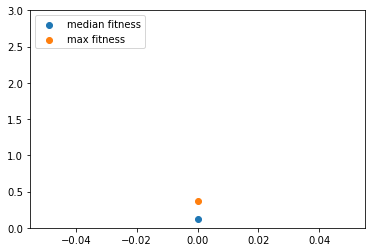

The max fitness is: 0.37228776851255346
The median fitness is: 0.12424962211237733


In [40]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2 = zeroth_iteration(conc_array, spectra_array, x_test)

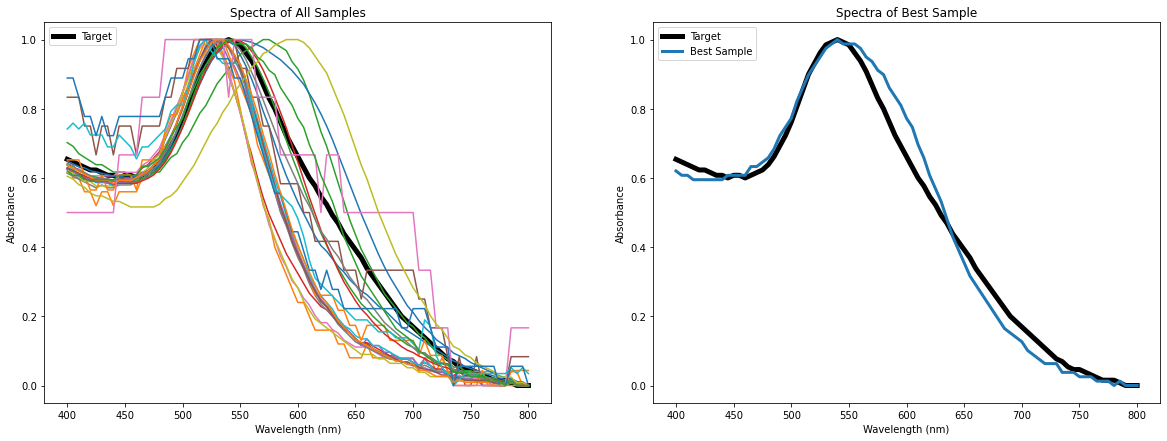

In [41]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, True)

## Nth Iteration 

In [42]:
conc_array

array([[0.33668342, 0.07537688, 0.35175879, 0.12060302, 0.11557789],
       [0.05      , 0.77      , 0.        , 0.06      , 0.12      ],
       [0.1928934 , 0.03045685, 0.25380711, 0.52284264, 0.        ],
       [0.2020202 , 0.        , 0.10606061, 0.        , 0.69191919],
       [0.08      , 0.41      , 0.21      , 0.275     , 0.025     ],
       [0.025     , 0.305     , 0.06      , 0.435     , 0.175     ],
       [0.165     , 0.61      , 0.16      , 0.025     , 0.04      ],
       [0.19095477, 0.18090452, 0.24623116, 0.12562814, 0.25628141],
       [0.14      , 0.27      , 0.405     , 0.055     , 0.13      ],
       [0.175     , 0.295     , 0.075     , 0.205     , 0.25      ],
       [0.49      , 0.095     , 0.22      , 0.045     , 0.15      ],
       [0.03517588, 0.45226131, 0.10050251, 0.31658291, 0.09547739],
       [0.39698492, 0.08542714, 0.06532663, 0.14070352, 0.31155779],
       [0.4822335 , 0.22335025, 0.        , 0.22335025, 0.07106599],
       [0.25380711, 0.43147208, 0.

In [101]:
Iterations = 30
Moves_ahead = 4
GA_iterations = 8
n_samples = 23
seed = 4
mutation_rate, mutation_rate_2, mutation_rate_list_1, mutation_rate_list_2_1, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc_1, best_conc_array, dictionary_of_moves = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2)

The best move has a fitness value of 0.5913529859258903
The best move occurs in 2 turns.

The surrogate model has a score of: 0.9999990992297003

[[0.36721992 0.25311203 0.12863071 0.20055325 0.05048409]
 [0.05330111 0.16455512 0.55275559 0.19277004 0.03661814]
 [0.34766323 0.03073793 0.05995088 0.3999289  0.16171906]
 [0.08346008 0.08698656 0.06112569 0.46044822 0.30797945]
 [0.19492917 0.01821151 0.5844918  0.00261518 0.19975234]
 [0.32721702 0.01382607 0.07834774 0.50164009 0.07896909]
 [0.22947137 0.43902257 0.13071154 0.18226998 0.01852455]
 [0.11116746 0.0183369  0.32934706 0.47900792 0.06214065]
 [0.04303233 0.30332544 0.22250862 0.36629958 0.06483403]
 [0.06517664 0.40488519 0.18894642 0.22515566 0.11583609]
 [0.18462663 0.06508474 0.08745762 0.60813556 0.05469545]
 [0.10661366 0.24250669 0.0558801  0.36815976 0.22683979]
 [0.09351753 0.22157279 0.15356004 0.15090329 0.38044633]
 [0.08518386 0.10438023 0.10764575 0.28434613 0.41844403]
 [0.05874643 0.26605293 0.13115481 0.16697

In [102]:
best_move

array([[0.6       , 0.41      , 0.7       , 0.6       , 0.59135299,
        0.59135299]])

In [103]:
best_conc_array

array([0.32581398, 0.02924501, 0.30219841, 0.1356745 , 0.2070681 ,
       0.59135299])

In [104]:
best_conc_array[:-1]

array([0.32581398, 0.02924501, 0.30219841, 0.1356745 , 0.2070681 ])

In [105]:
next_gen_conc_1[-1,:] = best_conc_array[:-1]

In [106]:
next_gen_conc_1

array([[0.36721992, 0.25311203, 0.12863071, 0.20055325, 0.05048409],
       [0.05330111, 0.16455512, 0.55275559, 0.19277004, 0.03661814],
       [0.34766323, 0.03073793, 0.05995088, 0.3999289 , 0.16171906],
       [0.08346008, 0.08698656, 0.06112569, 0.46044822, 0.30797945],
       [0.19492917, 0.01821151, 0.5844918 , 0.00261518, 0.19975234],
       [0.32721702, 0.01382607, 0.07834774, 0.50164009, 0.07896909],
       [0.22947137, 0.43902257, 0.13071154, 0.18226998, 0.01852455],
       [0.11116746, 0.0183369 , 0.32934706, 0.47900792, 0.06214065],
       [0.04303233, 0.30332544, 0.22250862, 0.36629958, 0.06483403],
       [0.06517664, 0.40488519, 0.18894642, 0.22515566, 0.11583609],
       [0.18462663, 0.06508474, 0.08745762, 0.60813556, 0.05469545],
       [0.10661366, 0.24250669, 0.0558801 , 0.36815976, 0.22683979],
       [0.09351753, 0.22157279, 0.15356004, 0.15090329, 0.38044633],
       [0.08518386, 0.10438023, 0.10764575, 0.28434613, 0.41844403],
       [0.05874643, 0.26605293, 0.

Run if satisfied with the best moves taken:

In [107]:
next_gen_conc = next_gen_conc_1
mutation_rate_list = mutation_rate_list_1
fitness_multiplier_list = mutation_rate_list_2_1

In [108]:
next_gen_conc

array([[0.36721992, 0.25311203, 0.12863071, 0.20055325, 0.05048409],
       [0.05330111, 0.16455512, 0.55275559, 0.19277004, 0.03661814],
       [0.34766323, 0.03073793, 0.05995088, 0.3999289 , 0.16171906],
       [0.08346008, 0.08698656, 0.06112569, 0.46044822, 0.30797945],
       [0.19492917, 0.01821151, 0.5844918 , 0.00261518, 0.19975234],
       [0.32721702, 0.01382607, 0.07834774, 0.50164009, 0.07896909],
       [0.22947137, 0.43902257, 0.13071154, 0.18226998, 0.01852455],
       [0.11116746, 0.0183369 , 0.32934706, 0.47900792, 0.06214065],
       [0.04303233, 0.30332544, 0.22250862, 0.36629958, 0.06483403],
       [0.06517664, 0.40488519, 0.18894642, 0.22515566, 0.11583609],
       [0.18462663, 0.06508474, 0.08745762, 0.60813556, 0.05469545],
       [0.10661366, 0.24250669, 0.0558801 , 0.36815976, 0.22683979],
       [0.09351753, 0.22157279, 0.15356004, 0.15090329, 0.38044633],
       [0.08518386, 0.10438023, 0.10764575, 0.28434613, 0.41844403],
       [0.05874643, 0.26605293, 0.

### Export Concentrations to CSV

In [109]:
itr = export_to_csv(next_gen_conc, itr)

Create those samples using the OT2 and perfrom UV-Vis on them

### Import Spectra from excel 

In [53]:
df = load_df(r'Iteration_1.xlsx')
df = subtract_baseline(df, 'D12')
df = normalize_df(df)
df = df.drop(['D12'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T

In [54]:
conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))

Plots the maximum and median fitness of the spectras of the next batch of samples.

The max fitness is: 0.35999928977515716
The median fitness is: 0.15808491458048168


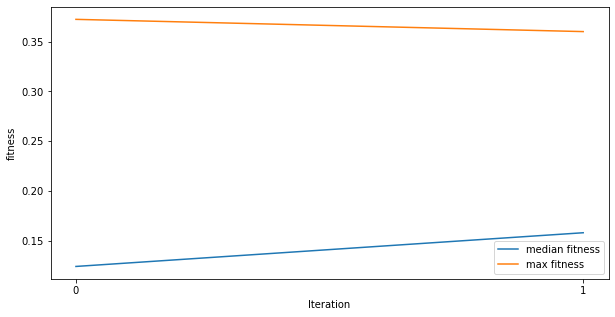

In [55]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration, True)

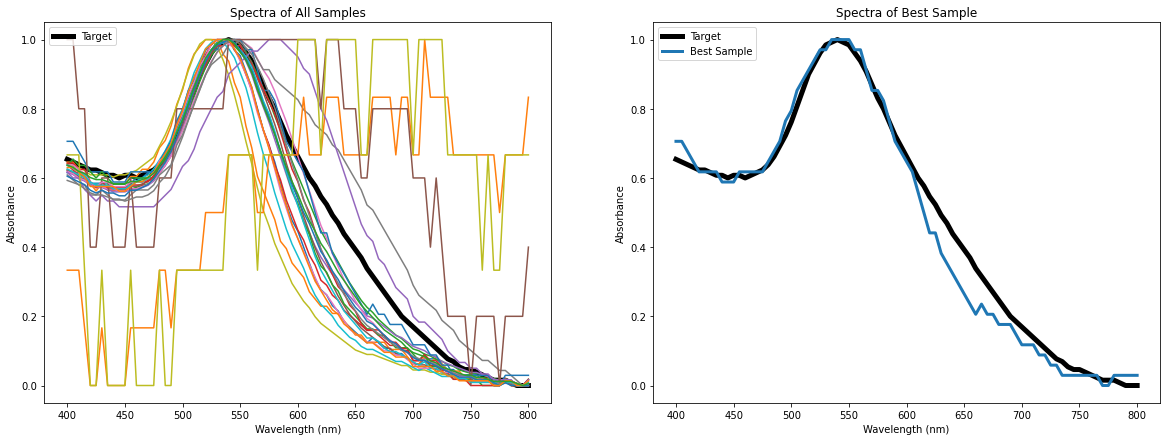

In [56]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, True)

In [128]:
a = current_gen_spectra[[9,13,14,17,20,21,22],:]

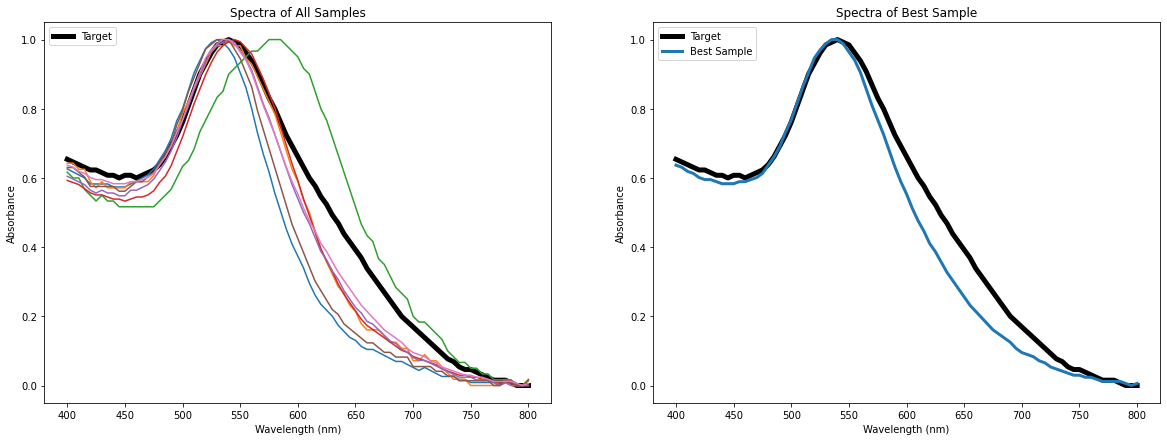

In [129]:
plot_spectra(a, x_test, wavelength, iteration, False)